# Exploratory Data Analysis for Car Insurance Fraud

The following report will use an open-source dataset uploaded by Oracle. This data sets includes  more then 15000 data samples about insurance claims, they include really important variables that could be correlated with the target variable of fraudulent or non-fraudulent claims.

In [20]:
# import all dependencies and data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import calendar

import utils

%matplotlib notebook
pd.set_option('chained_assignment',None)
sns.set_style("white")

data = pd.read_csv('claims.csv')
data = utils.clean_data(data)

Percentage of fraudulent claims:

* Fraudulent is equal to "1"
* Non Fraudulent is equal to "0"

In [21]:
counted = data.groupby(["FraudFound_P"]).size()
print(counted / counted.sum() * 100)

FraudFound_P
0    93.990684
1     6.009316
dtype: float64


In [22]:
utils.fraud_percentage(data, "AgeOfPolicyHolder")

AgeOfPolicyHolder
16 to 17    11.194030
18 to 20    16.666667
21 to 25    17.977528
26 to 30     5.604203
31 to 35     6.922484
36 to 40     6.246677
41 to 50     5.415570
51 to 65     5.202754
over 65      6.342495
Name: PolicyNumber, dtype: float64

<IPython.core.display.Javascript object>


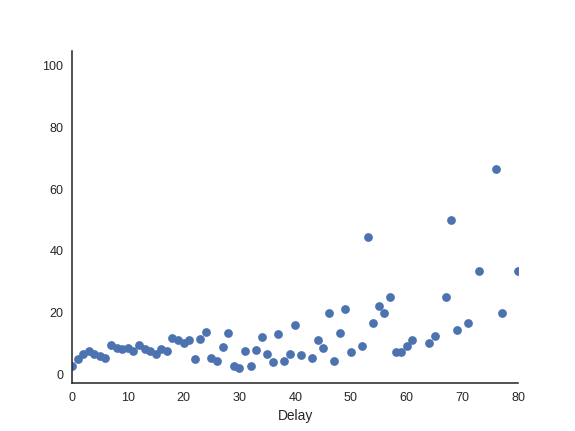

In [23]:
utils.fraud_percentage(data, "Delay").plot(style = 'o');
plt.xlim(0,80)
sns.despine()
plt.show()